In [1]:
import pandas as pd
import numpy as np
import os
import opendatasets as od
import librosa as li
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

### Import and Explore Dataset

Currently using the [British Birdsong Dataset](https://www.kaggle.com/datasets/rtatman/british-birdsong-dataset?resource=download).


Download sound files from Kaggle.

(Get kaggle.json API token from [here](https://www.kaggle.com/settings) an place it in the notebooks folder).


In [2]:
# Download British Birdsong Dataset from Kaggle
dataset_url = ("https://www.kaggle.com/datasets/rtatman/british-birdsong-dataset?resource=download")
path_to_download = "../datasets"

od.download(dataset_url, data_dir=path_to_download)

Skipping, found downloaded files in "../datasets\british-birdsong-dataset" (use force=True to force download)


In [5]:
csv_path = path_to_download + '/british-birdsong-dataset/birdsong_metadata.csv'

metadata = pd.read_csv(csv_path)[['file_id', 'english_cname']]
metadata.rename(columns={'english_cname':'label'}, inplace=True)
metadata.set_index('file_id', inplace=True)

In [15]:
# User defined variables
AUDIO_LENGHT = 3 # Seconds
SAMPLE_RATE = 44100

sound_files_path = path_to_download + '/british-birdsong-dataset/songs/songs/'

durations = []

for file_id, label, _ in metadata.itertuples():
  filename = sound_files_path + 'xc' + str(file_id) + '.flac'
  y, sr = li.load(filename, sr=None)
  
  duration = li.get_duration(y=y, sr=sr)
  durations.append(duration)
  
metadata['duration'] = durations

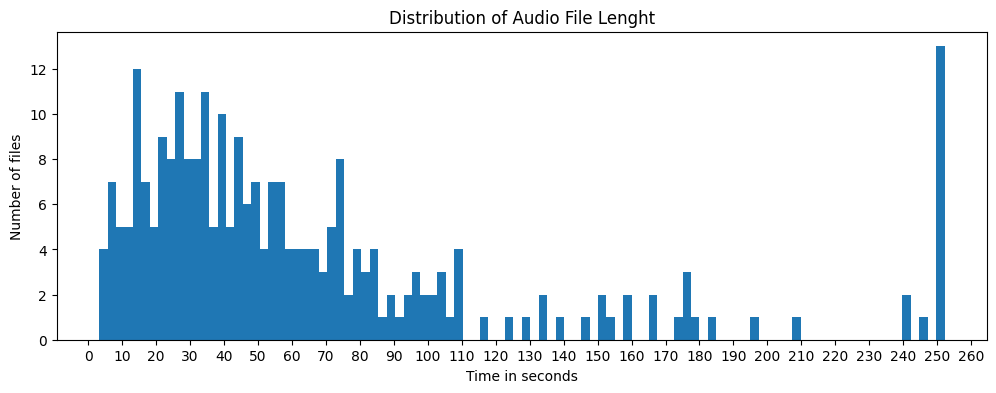

• Original file count: 264


In [17]:
# Plot histogram of original audio file durations
plt.subplots(figsize=(12, 4))
plt.title('Distribution of Audio File Lenght')
plt.xlabel('Time in seconds')
plt.ylabel('Number of files')
plt.xticks(range(0, 300, 10))
plt.hist(metadata['duration'], bins=100)
plt.show()

print(f'• Original file count: {len(metadata)}')
# print(f'• Total file count after splitting: {len(audio_data)}')